In [8]:
import pandas as pd
import pyreadstat
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np


# Setting the random seed for reproducibility
np.random.seed(42)
# Assuming you've already read your SPSS file into 'df'
# Make sure to include 'EID' when reading the data
# Path to your SPSS file

df, meta = pyreadstat.read_sav('/Users/evonwong/Library/CloudStorage/OneDrive-TheEducationUniversityofHongKong/Evon/UKBB/Clustering/SDOH_UK_UKBB_ENGonly.sav')

# Displaying the first few rows of the dataframe
print(df.head())

# Optionally, inspect the metadata
print(meta.variable_value_labels)  # Shows value labels for categorical variables

         EID Date_Attend_Assess Date_Home_location_before_intake  \
0  1000016.0         2008-11-29                       1999-02-02   
1  1000029.0         2009-11-05                       1979-07-08   
2  1000033.0         2008-01-17                       1987-11-09   
3  1000045.0         2008-09-19                       2005-06-01   
4  1000051.0         2007-08-23                       1998-10-06   

   East_coordinate  North_coordinate  East_North_coordinate  \
0         430000.0          567000.0  POINT (430000 567000)   
1         343000.0          148000.0  POINT (343000 148000)   
2         387000.0          350000.0  POINT (387000 350000)   
3         357000.0          170000.0  POINT (357000 170000)   
4         449000.0          189000.0  POINT (449000 189000)   

  LSOA_Datazone_code_2011   LSOA_Datazone_name_2011 Datzone_name_2011  \
0               E01008574       North Tyneside 029C                     
1               E01029148            Sedgemoor 003C               

In [9]:

# Selecting columns needed for analysis
columns_needed = ["EID",
# Census_High_Skill_Employment
"Census_High_Skill_Employment_rev",
# Census_Managers_Directors_Senior_Officials
"Census_Managers_Directors_Senior_Officials_rev",
# Census_Professional
"Census_Professional_rev",
# Census_Associate_Professional
"Census_Associate_Professional_rev",
"IMD_2010_Employmen",
# ONS_Net_Weekly_Income
"ONS_Net_Weekly_Income_rev",
# Census_Economically_Active
"Census_Economically_Active_rev",
"Census_Economically_Inactive",
# "IMD_2010_Income",
"IMD_2010_Income_IDACI",
"IMD_2010_Income_IDAOPI",
"Census_No_Adults_Employment",
#######SDOH_EDUCATION_DOMAIN##############
"Census_No_Qualification",
# "IMD_2010_Education",
"IMD_2010_Children_Young_People",
"IMD_Skills",
"IMD_Not_Staying_on_in_Edu",
"IMD_Not_Enter_Higher_Edu",
########### SDOH_HEALTH_DOMAIN###############
"PHP_Winter_Mortality",
"Census_Comm_Estab",
"Census_Disability",
# "IMD_Health",
"IMD_Potential_Life_Lost",
"IMD_Comparative_Illness_Disability",
"IMD_Acute_Morbidity",
"IMD_Mood_Anxiety",
########### SDOH_NEIGHBORHOOD_BUILD_ENVIRONMENT#######
"Census_Avg_Household_Size",
"Census_No_Central_Heating",
"Census_Pop_Density",
"Census_No_Car_Vans",
# "DT_Traffic",
# "IMD_Living_Environment",
"IMD_Air_quality",
"IMD_Traffic_Accident",
"IMD_NO2",
"IMD_PM",
"IMD_SO2",
"IMD_Benzene",
"Greenspace_1000m_rev",
# "Greenspace_300m_rev",
"Natural_Enviro_1000m_rev",
# "Natural_Enviro_300m_rev",
"NO2_2010",
"PM10_2010",
"PM2.5_2010",
# "IMD_Barriers",
"IMD_Wider_Barriers",
"IMD_Geographical_Barriers",
"IMD_Affordability_indicator",
"IMD_Distance_GP_indicator",
"IMD_Distance_Food_Shop",
"IMD_Distance_Primary_School",
"IMD_Distance_Post_Office",
###############SDOH_SOCIAL_AND_COMMUNITY_CONTEXT###################
"PHP_Violent_Crime",
"IMD_2010_Crime_Disorder",
"Census_Ethnic_Groups",
# "ONS_2010_population_18",
"ONS_2010_population_18_p",
# "ONS_2010_population_65",
"ONS_2010_population_65_p",
# "ONS_2011_population_18",
# "ONS_2011_population_18_p",
# "ONS_2011_population_65",
# "ONS_2011_population_65_p",
"PHP_Smoking_Prevalence",
# "Census_Household_Deprivation",
"Census_Limited_English_Proficiency",
"Census_Single",
"PHP_Suicide",
"PHP_Self_Harm"]


df = df[columns_needed]

# Exclude EID from the data used for clustering
df_for_clustering = df.drop(columns=['EID'])

In [10]:
df_clustering_non_scaled = df.dropna()

In [11]:
print(df_clustering_non_scaled)

              EID  Census_High_Skill_Employment_rev  \
0       1000016.0                          0.003215   
1       1000029.0                          0.002410   
2       1000033.0                          0.006803   
3       1000045.0                          0.006579   
4       1000051.0                          0.003831   
...           ...                               ...   
432415  6023617.0                          0.003484   
432416  6023623.0                          0.007634   
432418  6023649.0                          0.005025   
432419  6023655.0                          0.004386   
432420  6023668.0                          0.003401   

        Census_Managers_Directors_Senior_Officials_rev  \
0                                             0.017241   
1                                             0.008065   
2                                             0.018519   
3                                             0.020408   
4                                             0.0

In [12]:
# Handle missing values
df_for_clustering = df_for_clustering.dropna()

# Scaling the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_for_clustering)

# Convert scaled data back to DataFrame
df_scaled_features = pd.DataFrame(scaled_features, columns=df_for_clustering.columns)



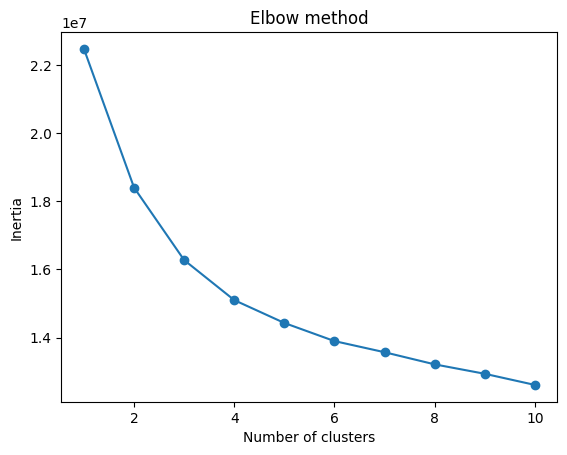

In [13]:
# Finding optimal number of clusters using the elbow method
inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(df_scaled_features)
    inertias.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [14]:
# Clustering with the optimal number of clusters
# k = 3  # Optimal number of clusters determined from the elbow method
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(df_scaled_features)

# Add the cluster assignments to the scaled DataFrame
df_scaled_features['Cluster'] = clusters

# Reattach the 'EID' to the scaled DataFrame
df_scaled_features['EID'] = df_clustering_non_scaled['EID'].values

# Reordering columns so 'EID' is first and 'Cluster' is last
columns = ['EID'] + [col for col in df_scaled_features.columns if col not in ['EID', 'Cluster']] + ['Cluster']
df_final = df_scaled_features[columns]

# Save the DataFrame with EID, scaled features, and cluster labels
pyreadstat.write_sav(df_final, '/Users/evonwong/Downloads/26 June UKBB_SDOH_kmeancluster_data_k4_updatedvariables.sav')

In [8]:
# Exclude EID from the data used for clustering
df_cluster_evaluate= df_final.drop(columns=['EID'])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df_final is already loaded and contains the clusters
# Let's assume the first two features are 'Feature1' and 'Feature2'
# You should replace 'Feature1' and 'Feature2' with the actual feature names

# Scatter plot of the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cluster_evaluate, x='IMD_2010_Employmen', y='IMD_Air_quality', hue='Cluster', palette='viridis', style='Cluster', s=50)
plt.title('Cluster Visualization with First Two Features')
plt.xlabel('Feature1 (Scaled)')
plt.ylabel('Feature2 (Scaled)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score
# Evaluating with Silhouette Score
silhouette_avg = silhouette_score(df_cluster_evaluate, clusters)
print(f'Silhouette Score: {silhouette_avg:.2f}')

# Evaluating with Davies-Bouldin Index
dbi = davies_bouldin_score(df_cluster_evaluate, clusters)
print(f'Davies-Bouldin Index: {dbi:.2f}')